#Assignment 6
Choose a dataset that has at least 1000 greyscale images and divide them into train and test.

Optimize the architecture of your autoencoder and tune it to get a fine performance.

show three cases; the original images, the latent form "the represntation outputted from the hidden layer, google how to get the output of an intermediate layer in keras", and the reconstructed one.

#Fashion MNIST Dataset

a dataset comprising of 28×28 grayscale images of 70,000 fashion products from 10 categories, with 7,000 images per category. The training set has 60,000 images and the test set has 10,000 images.

Each training and test example is assigned to one of the following labels:

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

##Pre-processing

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [ ]:
# Split dataset into training and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


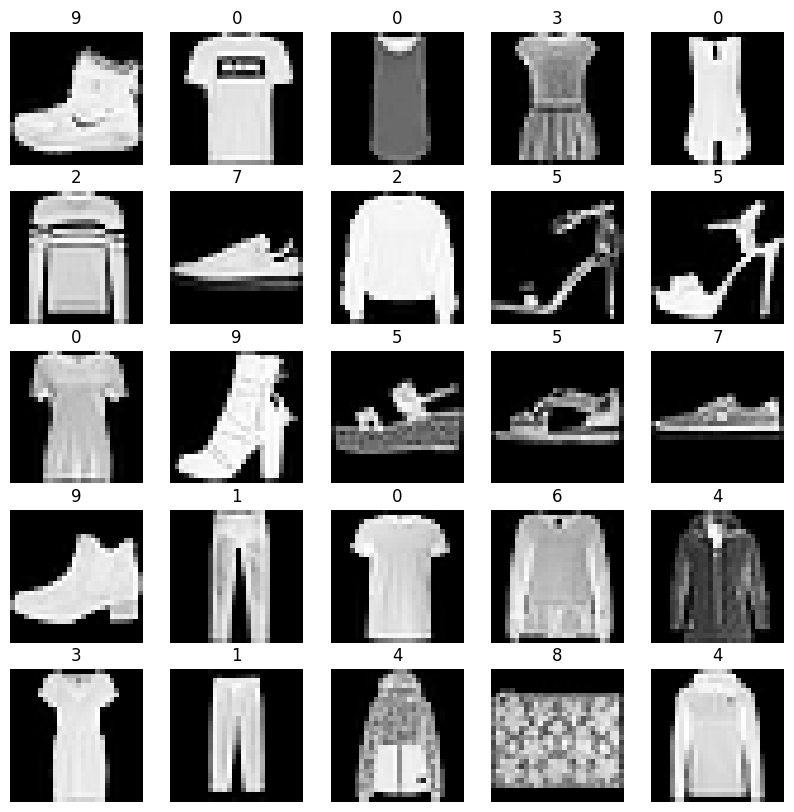

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='Greys_r')
    plt.title(y_train[i])
    plt.axis('off')

plt.show()

###Flattening and normalizing images


In [ ]:
train_images = X_train.reshape((60000, -1))
train_images = train_images.astype('float32') / 255

test_images = X_test.reshape((10000, -1))
test_images = test_images.astype('float32') / 255

In [ ]:
# summarize the shape of the dataset
print('Train', train_images.shape, y_train.shape)
print('Test', test_images.shape, y_test.shape)

Train (60000, 784) (60000,)
Test (10000, 784) (10000,)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

encoding_dim = 32   # dimension of the latent representation
image_size = train_images.shape[1]

# Create input layer. This returns a tensor
inputs = layers.Input(shape=(image_size,), name = 'input_image')

# Create hidden layer
encoded = layers.Dense(encoding_dim,
                       activation='relu',
                       name = 'encoded')(inputs)
                       ## The output of this layer represents the encoding vector

# Create output layer
output_image = layers.Dense(image_size, # Why?
                            activation='sigmoid',
                            name = 'reconstructed')(encoded)

# Create model
model = Model(inputs=inputs, outputs=output_image)


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 784)]             0         
                                                                 
 encoded (Dense)             (None, 32)                25120     
                                                                 
 reconstructed (Dense)       (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


## Training

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

model.fit(train_images,
          train_images, # train_images are both the inputs and the labels
          epochs=10,
          batch_size=64)

Epoch 1/10
938/938 [==============================] - 8s 7ms/step - loss: 0.0126
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0126
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0125
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0125
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0125
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0125
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0125
Epoch 8/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0124
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0124
Epoch 10/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0124


## Results

Below we plot some of the test images along with their reconstructions.

In [ ]:
# Define the new model that outputs the activations of the 'encoded' layer
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('encoded').output)

1/1 [==============================] - 0s 22ms/step


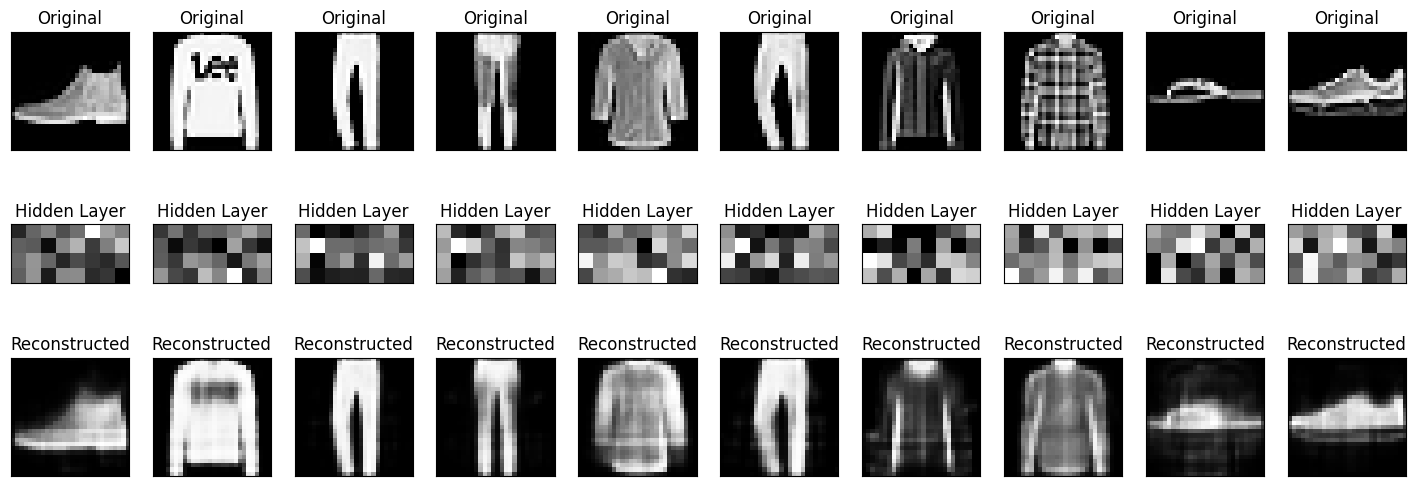

In [ ]:
# Get first few samples of test images
in_imgs = test_images[:10]

# Get intermediate samples of test images
activations = intermediate_layer_model.predict(np.array([in_imgs]).reshape(-1, 784))

# Get model's reconstructions
reconstructed = model.predict(in_imgs)

n = 10  # number of images to show

plt.figure(figsize=(18, 6))
for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(in_imgs[i].reshape(28, 28), cmap='Greys_r')
    plt.title('Original')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Hidden Layer
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(activations[i].reshape(4,8), cmap='Greys_r')
    plt.title('Hidden Layer')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='Greys_r')
    plt.title('Reconstructed')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()